Домашнее задание:

задание 1: Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

задание 2: Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

задание 3: Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией 
eval_model и X, на выходе - массив y_pred_proba).

задание 4: Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

задание 5: Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

задание 6: Могла ли модель переобучиться? Почему?

задание 7: (опция) Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [1034]:
import numpy as np
import matplotlib.pyplot as plt

In [1035]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [1036]:
def calc_std_feat(x, X):
    res = (x - X.mean()) / X.std()
    return res

In [1037]:
X_st = X.copy()
X_st[1, :] = calc_std_feat(X[1, :], X[1, :])
X_st[2, :] = calc_std_feat(X[2, :], X[2, :])
X_st[3, :] = calc_std_feat(X[3, :], X[3, :])

In [1038]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [1039]:
W = np.random.randn(X.shape[0])
z = np.dot(W, X_st)
z, W

(array([-2.33516106, -1.68380081, -0.62198161, -2.00948093,  1.57415892,
        -1.27450034,  2.55235779,  3.7626567 , -2.49800112,  0.19221871]),
 array([-0.23415337, -0.23413696,  1.57921282,  0.76743473]))

In [1040]:
# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))

def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res
# задание 1: Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.
# я попробовал добавить в лог лосс оченьмаленькую прибавку типо 1e-300 но логорифм от такого числа всего -690.
def log_safe(a):
    l = np.log(a)
    if -np.inf in l:
        l[l == -np.inf] = -999 
    return l

def calc_logloss(y, y_pred):
    err = - np.mean(y * log_safe(y_pred) + (1.0 - y) * log_safe(1.0 - y_pred))
    # err = - np.mean(y * np.log(y_pred)) + (1.0 - y) * np.log(1.0 - y_pred)
    return err

def eval_model(X, y, iterations=1000, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for_graph = []
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        # g = alpha * (1/n * np.dot((y_pred - y), X.T))
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        for_graph.append([i, err])
        # if i % (iterations / 10) == 0:
        #     print(i, W, err, 'g', 'y_pred', 'z')
    return W, err, for_graph

# задание 3: Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).
def calc_pred_proba(w, x):
    return sigmoid(np.dot(w, x))

# задание 4: Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).
def calc_pred(w, x):
    # порог отнесенияя к классу 0.5
    pred = calc_pred_proba(w, x)
    pred[pred >= 0.5] = 1
    pred[pred != 1] = 0
    return pred 


In [1041]:
y1 = np.array([1, 0])
y_pred1 = np.array([0.0002, 1])
calc_logloss(y1, y_pred1)

503.7585965957081

In [1042]:
# w, err  = eval_model(X_st, y, 50000, 0.001)


In [1043]:
iters = np.array([10 * 2**i for i in range(11)])
alphas = np.array([0.000001 *10 **i for i in range(11)])
min_log_loss = np.inf
for i in iters:
    print(f'iters = {i}')
    for a in alphas:
        w, err , for_graph = eval_model(X_st, y, i, a)
        print(f'alpha = {a:e},\t logg_loss = {err:e}')
        if err < min_log_loss and err > 0:
            min_log_loss = err
            min_params = (i, a)
    print('\n')
print(min_log_loss, min_params)

iters = 10
alpha = 1.000000e-06,	 logg_loss = 7.638474e-01
alpha = 1.000000e-05,	 logg_loss = 7.638366e-01
alpha = 1.000000e-04,	 logg_loss = 7.637288e-01
alpha = 1.000000e-03,	 logg_loss = 7.626519e-01
alpha = 1.000000e-02,	 logg_loss = 7.520233e-01
alpha = 1.000000e-01,	 logg_loss = 6.598490e-01
alpha = 1.000000e+00,	 logg_loss = 4.667999e-01
alpha = 1.000000e+01,	 logg_loss = 4.578635e-01
alpha = 1.000000e+02,	 logg_loss = 5.258803e+00
alpha = 1.000000e+03,	 logg_loss = 1.470016e+02
alpha = 1.000000e+04,	 logg_loss = 1.998000e+02


iters = 20
alpha = 1.000000e-06,	 logg_loss = 7.638461e-01
alpha = 1.000000e-05,	 logg_loss = 7.638233e-01
alpha = 1.000000e-04,	 logg_loss = 7.635957e-01
alpha = 1.000000e-03,	 logg_loss = 7.613261e-01
alpha = 1.000000e-02,	 logg_loss = 7.392755e-01
alpha = 1.000000e-01,	 logg_loss = 5.822555e-01
alpha = 1.000000e+00,	 logg_loss = 4.187134e-01
alpha = 1.000000e+01,	 logg_loss = 5.921662e-01
alpha = 1.000000e+02,	 logg_loss = 5.095539e+00
alpha = 1.000000

In [1044]:
print(f'min_log_loss = {min_log_loss}, for iters = {min_params[0]}, and alpha = {min_params}')

min_log_loss = 3.182549416394162e-08, for iters = 10240, and alpha = (10240, 1000.0)


Из получившихся результатов видно что при большом alpha и малом количестве итераций, log_loss может разойтись, но при увелечнии количества итераци всеравно сходится. в 0 видимо происзодит момент преобучения, в этой ситуации если посмотреть на вектор y_pred он будет соответствовать просто y.

In [1045]:
w, err , for_graph = eval_model(X_st, y, 10000, 1000)

(10000,)

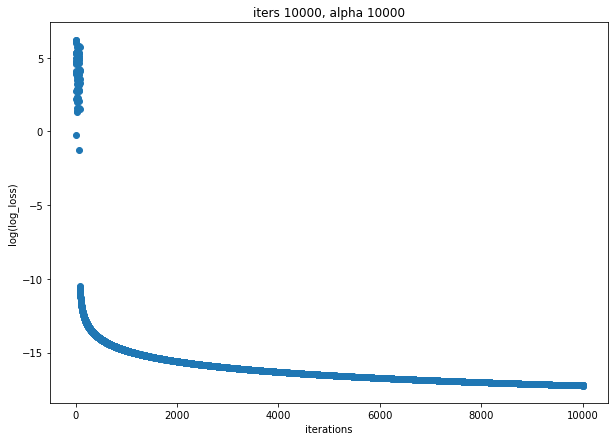

In [1046]:
for_graph = np.array(for_graph).T
fig = plt.figure(figsize=(10,7))
plt.title('iters 10000, alpha 10000')
plt.xlabel('iterations')
plt.ylabel('log(log_loss)')
plt.scatter(for_graph[0], np.log(for_graph[1]))
for_graph[1].shape

In [1047]:
w

array([ 202.89275108, -822.21683041, -625.68214384, 1451.12134894])

Как мы видим чем больше итераций мы делаем тем больше график log_loss уходит в 0. 



In [1048]:
w, err , for_graph = eval_model(X_st, y, 200, 10000)
w

array([ 2103.30135353, -9284.80701022, -6406.63303901, 15775.66206454])

In [1049]:
for_graph

[[1, 0.7638486084351401],
 [2, 640.4551950375974],
 [3, 299.7],
 [4, 199.80000034772405],
 [5, 199.8],
 [6, 599.4],
 [7, 225.30212680641677],
 [8, 199.8],
 [9, 442.45964697087095],
 [10, 199.8],
 [11, 199.8],
 [12, 199.8],
 [13, 99.9],
 [14, 199.8],
 [15, 199.8],
 [16, 599.4],
 [17, 199.8],
 [18, 199.8],
 [19, 199.8],
 [20, 299.7],
 [21, 99.9],
 [22, 99.9],
 [23, 127.3712362663011],
 [24, 399.6],
 [25, 199.8],
 [26, 199.8],
 [27, 199.8],
 [28, 99.9],
 [29, 99.90029079868012],
 [30, 99.9],
 [31, 236.7300819613592],
 [32, 199.8],
 [33, 399.6],
 [34, 107.19600279566407],
 [35, 99.9],
 [36, 99.9],
 [37, 399.6],
 [38, 199.8],
 [39, 199.8],
 [40, 299.7],
 [41, 99.9],
 [42, 109.91286698793787],
 [43, 199.8],
 [44, 99.9],
 [45, 99.9],
 [46, 299.7],
 [47, 199.8],
 [48, 104.15331251006646],
 [49, 499.5],
 [50, 99.9],
 [51, 99.9],
 [52, 121.33859972514597],
 [53, 99.9],
 [54, 99.9],
 [55, 199.8],
 [56, 99.9],
 [57, 99.9],
 [58, 199.80000013074886],
 [59, 99.9],
 [60, 125.60092077868303],
 [61, 29

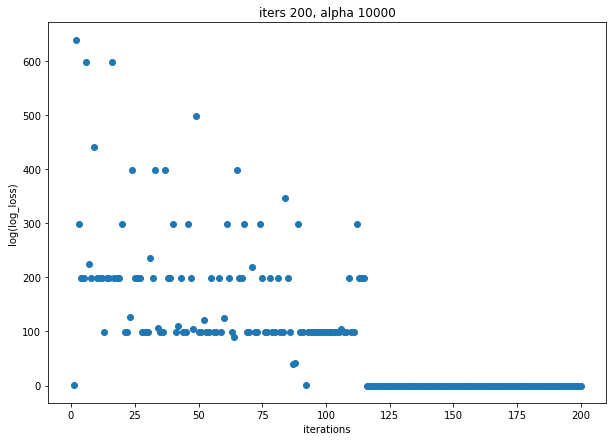

In [1050]:
for_graph = np.array(for_graph).T
fig = plt.figure(figsize=(10,7))
plt.title('iters 200, alpha 10000')
plt.xlabel('iterations')
plt.ylabel('log(log_loss)')
plt.scatter(for_graph[0], for_graph[1])
# plt.scatter(for_graph[0], log_safe(for_graph[1]))
# for_graph[1].shape

при больших значениях alpha наша ошибка выглдяит так, подозреваю, что это из-за того как я адаптировал функцию log_loss, чтобы она не выдавала бесконечности. Она пытается расходиться, но у нее это не получается.

In [1053]:
w

array([ 2103.30135353, -9284.80701022, -6406.63303901, 15775.66206454])

In [1054]:
calc_pred_proba(w, X_st) , y

(array([5.06842079e-198, 0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
        1.00000000e+000, 0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
        1.00000000e+000, 1.00000000e+000]),
 array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]))

похоже что при данных значениях мы назодимся в переобучении так как предсказываем со 100% вероятностью. попробуем взять alpha поменьше:

In [1055]:
w, err , for_graph = eval_model(X_st, y, 10000, alpha=0.01)

In [1056]:
w, err

(array([ 0.37709968, -2.73927415, -1.18092674,  4.58661313]),
 0.31007008824526155)

In [1057]:
calc_pred_proba(w, X_st) , y

(array([0.26667338, 0.18262692, 0.96351979, 0.2218171 , 0.64352988,
        0.3178045 , 0.98768905, 0.15130644, 0.29115199, 0.93492759]),
 array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]))

Так получилось поинтересней, хотя некотрые значения и близки к 1.

In [1058]:
pred = calc_pred(w, X_st)
pred, y

(array([0., 0., 1., 0., 1., 0., 1., 0., 0., 1.]),
 array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]))

Предсказание выглядит весьма близко к оригиналу.

задание 5: Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [1059]:
def accuracy(pred, y):
    l = y.shape[0]
    return (l - np.sum(np.abs(y - pred))) / l

print(accuracy(pred, y))


0.9


0.9  accuracy выглядит неплохо.

матрица ошибок:

In [1060]:
def matrix_of_mistakes(pred, y, prnt=0):
    tp, tn, fp, fn = 0, 0, 0, 0
    for i in range(y.shape[0]):
        if pred[i] == y[i] == 1:
            tp +=1
        elif pred[i] == y[i] == 0:
            tn +=1
        elif pred[i] != y[i] and pred[i]:
            fp +=1
        else:
            fn +=1
    if prnt:    
        print(
            f'\ty=+1\ty=-1\n'
            f'a(x)=+1\t {tp}, \t{fp}\n'
            f'a(x)=-1, {fn}, \t{tn}\n')
    return tp, fp, fn, tn

mistakes = matrix_of_mistakes(pred, y, prnt=1)
mistakes

	y=+1	y=-1
a(x)=+1	 4, 	0
a(x)=-1, 1, 	5



(4, 0, 1, 5)

точность и полнота

In [1061]:
def precision_recall(pred, y):
    mstks = matrix_of_mistakes(pred, y)
    precision = mstks[0]/ (mstks[0] + mstks[1])
    recall = mstks[0]/ (mstks[0] + mstks[2])
    return precision, recall

precision, recall = precision_recall(pred, y)
print(f'precision = {precision}')
print(f'recall = {recall}')


precision = 1.0
recall = 0.8


F1 score

In [1062]:
def F1_score(pred, y):
    pre, rec = precision_recall(pred, y)
    return 2 * pre * rec /  (pre + rec)
print(F1_score(pred, y))

0.888888888888889


задание 6: Могла ли модель переобучиться? Почему?

Не очень уверен в этих словах, но я это понимаю так.
В данном случае у нас все признаки линейные, и раз мы строим гиперплоскость которая будет разделять наши классы, то она не может переобучиться.
в прстейшем примере если у нас только 1 признак мы получаем прямую. Если какойто пример за счет шума попадает в другой кластер, то мы не сможем провести прямую так, чтобы он попал в свой класс обратно, не ухудшив результат. Для возможности переобучения нам нужно вводить дополнительные признаки соответствующие другим степеням наших призаков, что бы мы могли получить не гиперплоскоть а гиперповерхность, которая уже сможет выгнуться таким образом, чтобы точно разделить нашу выборку по классам и соответственно переобучиться. Если говорить об, конретно, этих данных, то модель не может переобучиться. При этом мне сложно понять поведение модели при больших alpha. Но смотря на пример с alpha = 10000, я не понимаю, что там происходит, почему мы получаем идеальную модель с вектором w с огромным коэффициентами.

In [1063]:

def eval_model_reg(X, y, iterations=1000, alpha=1e-4, L1=0, L2=0):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for_graph = []
    l1 = L1
    l2 = L2 
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        # g = alpha * (1/n * np.dot((y_pred - y), X.T))
        if L1:
            l1 = L1 * np.sign(w)
        else:
            l1 = 0
        if L2:
            l2 = L2 * w
        else:
            l2 = 0
        W -= alpha * (1/n * np.dot((y_pred - y), X.T)) - l1 - l2
        for_graph.append([i, err])
        # if i % (iterations / 10) == 0:
        #     print(i, W, err, 'g', 'y_pred', 'z')
    return W, err, for_graph

In [1133]:
w, err , for_graph = eval_model_reg(X_st, y, 15000, 100, L1=0)


In [1134]:
w, err

(array([  88.80870232, -138.16456374, -239.50921794,  462.40590977]),
 1.7154412913483742e-06)

In [1135]:
pred = calc_pred(w,X_st)
pred, y

(array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]),
 array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]))

Поигрался немного с данными но так и не понял какой выбирать l1 и l2, особенно непонятно с учетом того что у нас нету того на чем проверить. По сути нам нужно разбивать на тестовые и проверочные данные, но у нас 10 случаев, так что врядли в этом есть смысл

In [1149]:
X = np.array([[1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [1163]:
X1 = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
                [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64)
X_st[1, :] = calc_std_feat(X1[1, :], X1[1, :])
X_st[2, :] = calc_std_feat(X1[2, :], X1[2, :])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

[-6.94386424 -1.59452597  6.84786834] 0.3295610482542183
[-7.11958349 -1.63361493  7.02875661] 0.32947019084385454
[-42.8782253  -18.35225691  43.94792023] 1.34808376827351
[-407.77050401 -111.3704636   483.3433781 ] 104.47975895158152
[-4050.92914412  -986.60483951  4807.59993991] 132.89340437182653


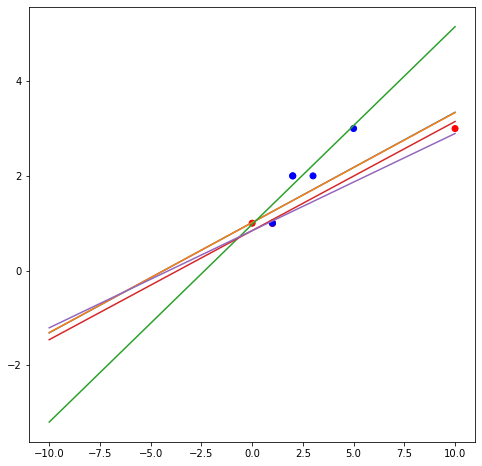

In [1197]:
from matplotlib.colors import ListedColormap
colors = ListedColormap(['red', 'blue'])
def igrek(x):
    return -w[0]/w[2] - w[1]/w[2] * x
u = np.linspace(-10, 10, 100)
plt.figure(figsize=(8, 8))
# plt.scatter([x[0] for x in X], [x[1] for x in X],' c=y, cmap=colors')
plt.scatter([x for x in X[0]], [x for x in X[1]], c=y, cmap=colors)
for i in [0.1, 1, 10, 100, 1000]: 
    w, err , for_graph = eval_model_reg(X1, y, 10000, i)
    plt.plot(u, igrek(u),)
    print(w, err)

В данном случае видно, если большие alpha, то результат получается не особо хорошим, хотя в общем все прямые явно одного класса, скорей всего это из за log_safe c ограничением.